# importing dependencies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# dataset

In [2]:
#reading data

train_data = pd.read_excel(r"C:\Users\Saifa\Desktop\data science course\project-1(flight fare)\Flight_Fare_dataset/Data_Train.xlsx")  #the r before the address path converts normal string to a raw string

In [3]:
#data preview with head()

train_data.head(100)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24 00:00:00,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
95,IndiGo,21/06/2019,Chennai,Kolkata,MAA → CCU,05:15,07:40,2h 25m,non-stop,No info,3540
96,SpiceJet,15/05/2019,Banglore,Delhi,BLR → DEL,05:55,08:35,2h 40m,non-stop,No check-in baggage included,3257
97,Jet Airways,3/06/2019,Banglore,Delhi,BLR → DEL,19:50,22:50,3h,non-stop,In-flight meal not included,6478
98,Jet Airways,18/06/2019,Mumbai,Hyderabad,BOM → HYD,07:05,08:30,1h 25m,non-stop,No info,8040


In [4]:
train_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [5]:
train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [6]:
#shape/size of data frame

train_data.shape

(10683, 11)

In [7]:
len(train_data.columns)

11

# dealing with missing values

In [8]:
#checking missing values

train_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [9]:
#dropping/removing the missing values

train_data.dropna(inplace=True) #dropping

train_data.isna().sum() #checking


Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

# changing data type

In [10]:
#convertin data types 

def change_datetime(col):
    train_data[col] = pd.to_datetime(train_data[col])
               
for i in ['Date_of_Journey','Dep_Time', 'Arrival_Time']:
    change_datetime(i)

In [11]:
train_data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [12]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2021-04-25 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-04-25 05:50:00,2021-04-25 13:15:00,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2021-04-25 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2021-04-25 18:05:00,2021-04-25 23:30:00,5h 25m,1 stop,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2021-04-25 16:50:00,2021-04-25 21:35:00,4h 45m,1 stop,No info,13302


# extracting data from column

In [13]:
train_data['Journey_day'] = train_data['Date_of_Journey'].dt.day
train_data['Journey_month'] = train_data['Date_of_Journey'].dt.month

In [14]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2021-04-25 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-04-25 05:50:00,2021-04-25 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2021-04-25 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2021-04-25 18:05:00,2021-04-25 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2021-04-25 16:50:00,2021-04-25 21:35:00,4h 45m,1 stop,No info,13302,3,1


In [15]:
#dropping column after extracting data
train_data.drop('Date_of_Journey', axis=1,inplace=True)

In [16]:
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,2021-04-25 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-04-25 05:50:00,2021-04-25 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2021-04-25 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2021-04-25 18:05:00,2021-04-25 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2021-04-25 16:50:00,2021-04-25 21:35:00,4h 45m,1 stop,No info,13302,3,1


# data extraction from column using function

In [17]:
#declaring function

def extract_hour(df,col):
    df[col+'_hour']=df[col].dt.hour

def extract_minute(df,col):
    df[col+'_minute']=df[col].dt.minute

def drop_column(df,col):
    df.drop(col,axis=1,inplace=True)

In [18]:
extract_hour(train_data,'Dep_Time')
extract_minute(train_data, 'Dep_Time')
drop_column(train_data, 'Dep_Time')

In [19]:
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-04-25 13:15:00,7h 25m,2 stops,No info,7662,5,1,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2021-04-25 23:30:00,5h 25m,1 stop,No info,6218,5,12,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2021-04-25 21:35:00,4h 45m,1 stop,No info,13302,3,1,16,50


In [20]:
extract_hour(train_data,'Arrival_Time')
extract_minute(train_data, 'Arrival_Time')
drop_column(train_data, 'Arrival_Time')

In [21]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [22]:
#time = "2h 50m"
#time.split(' ')

#"2h 50m".split(' ')

#"2h 50m".split(' ')[0]

#"2h 50m".split(' ')[0][0:-1]

#"2h 50m".split(' ')[1][0:-1]

In [23]:
duration = list(train_data['Duration'])

for i in range(len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]:
            duration[i]=duration[i]+' 0m'
        else:
            duration[i]='0h' + duration[i]


In [24]:
train_data['Duration']=duration

In [25]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [26]:
def hour(x):
    return x.split(' ')[0][0:-1]

def minute(x):
    return x.split(' ')[1][0:-1]

In [27]:
train_data['Duration_hours']=train_data['Duration'].apply(hour)
train_data['Duration_mins']=train_data['Duration'].apply(minute)

In [28]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [29]:
#removing column
drop_column(train_data,'Duration')

In [30]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [31]:
train_data.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
Journey_day             int64
Journey_month           int64
Dep_Time_hour           int64
Dep_Time_minute         int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
Duration_hours         object
Duration_mins          object
dtype: object

In [32]:
#convertin data types 

def change_tointeger(col):
    train_data[col] = train_data[col].astype(int)
    
for i in ['Duration_hours','Duration_mins']:
    change_tointeger(i)

In [33]:
train_data.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
Journey_day             int64
Journey_month           int64
Dep_Time_hour           int64
Dep_Time_minute         int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
Duration_hours          int32
Duration_mins           int32
dtype: object

In [34]:
#extracting categorial and continuous data by using list comprehension

cate_col = [col for col in train_data.columns if train_data[col].dtype == object]
cont_col = [col for col in train_data.columns if train_data[col].dtype != object ]
print(cate_col)
print(cont_col)

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']
['Price', 'Journey_day', 'Journey_month', 'Dep_Time_hour', 'Dep_Time_minute', 'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours', 'Duration_mins']


In [35]:
categorical = train_data[cate_col]

In [36]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


# plotting data on matplotlib

# Airline/Price

In [37]:
categorical['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

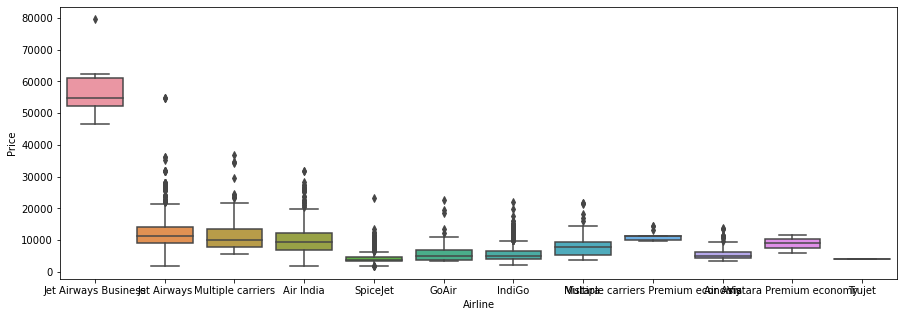

In [38]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Airline', y='Price', data=train_data.sort_values('Price', ascending=False))


# Total_Stops/Price

In [39]:
categorical['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

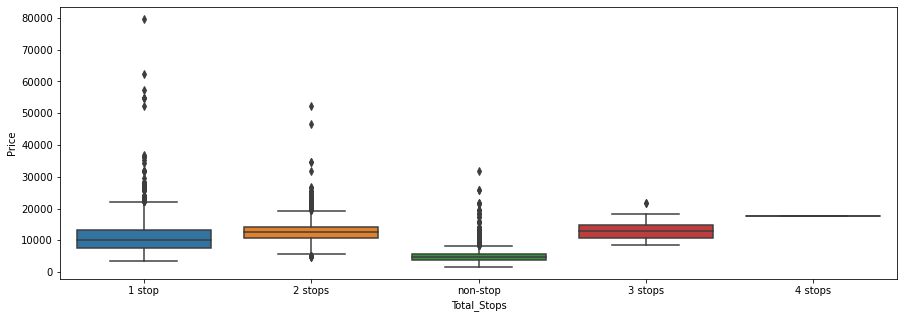

In [40]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Total_Stops',y='Price',data=train_data.sort_values('Price',ascending=False))

# Source/Price

In [41]:
categorical['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

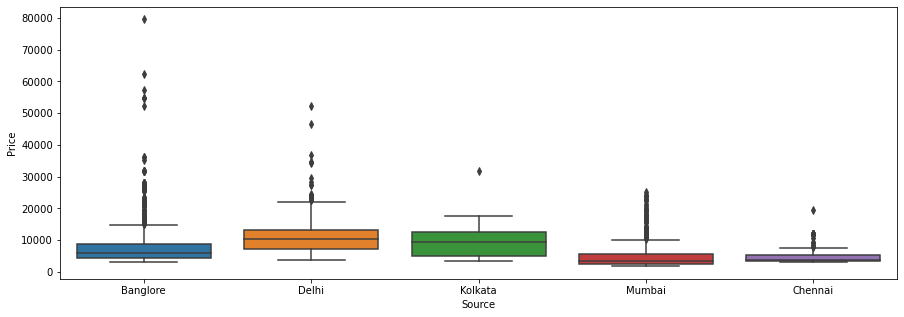

In [42]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Source',y='Price',data=train_data.sort_values('Price',ascending=False))

# Destination/Price

In [43]:
categorical['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

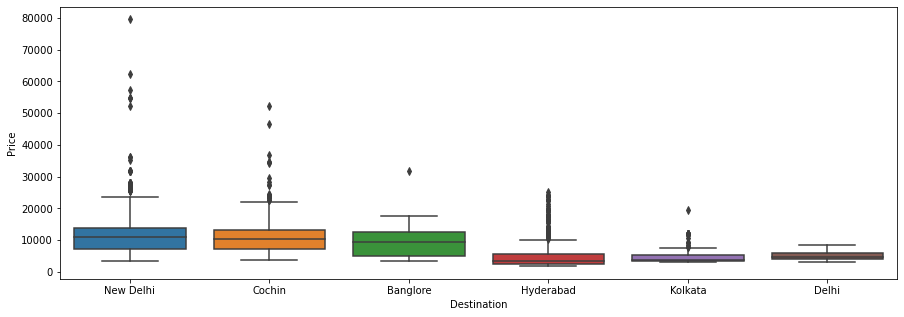

In [44]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Destination',y='Price',data=train_data.sort_values('Price',ascending=False))

# Converting categorical data into dummy data

In [45]:
Airline=pd.get_dummies(categorical['Airline'],drop_first=True)

In [46]:
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [47]:
Source=pd.get_dummies(categorical['Source'],drop_first=True)

In [48]:
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [49]:
Destination=pd.get_dummies(categorical['Destination'],drop_first=True)

In [50]:
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


# Dummyfying more complex categorical data

In [51]:
#categorical.head()

In [52]:
#categorical['Route'].str.split('→')

In [53]:
#categorical['Route'].str.split('→').str[0]

In [54]:
categorical['Route_1'] = categorical['Route'].str.split('→').str[0]
categorical['Route_2'] = categorical['Route'].str.split('→').str[1]
categorical['Route_3'] = categorical['Route'].str.split('→').str[2]
categorical['Route_4'] = categorical['Route'].str.split('→').str[3]
categorical['Route_5'] = categorical['Route'].str.split('→').str[4]

<ipython-input-54-4d2e7a50b43c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical['Route_1'] = categorical['Route'].str.split('→').str[0]
<ipython-input-54-4d2e7a50b43c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical['Route_2'] = categorical['Route'].str.split('→').str[1]
<ipython-input-54-4d2e7a50b43c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [55]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,BLR,NAG,DEL,NaN,NaN


In [56]:
drop_column(categorical,'Route')

C:\Users\Saifa\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [57]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,1 stop,No info,BLR,NAG,DEL,NaN,NaN


In [58]:
categorical.dtypes

Airline            object
Source             object
Destination        object
Total_Stops        object
Additional_Info    object
Route_1            object
Route_2            object
Route_3            object
Route_4            object
Route_5            object
dtype: object

In [59]:
#checking for null values

categorical.isnull().sum()

Airline                0
Source                 0
Destination            0
Total_Stops            0
Additional_Info        0
Route_1                0
Route_2                0
Route_3             3491
Route_4             9116
Route_5            10636
dtype: int64

In [60]:
#replacing missing/null values with none

for i in ['Route_3', 'Route_4', 'Route_5']:
    categorical[i].fillna('None', inplace=True)

C:\Users\Saifa\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [61]:
categorical.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Route_1            0
Route_2            0
Route_3            0
Route_4            0
Route_5            0
dtype: int64

In [62]:
#printing sub categories of the columns. here the columns with higher sub categories will be added as column in the data frame which will made it difficult to work with algorithms

for i in categorical.columns:
    print('{} has total {} categories'.format(i,len(categorical[i].value_counts())))

Airline has total 12 categories
Source has total 5 categories
Destination has total 6 categories
Total_Stops has total 5 categories
Additional_Info has total 10 categories
Route_1 has total 5 categories
Route_2 has total 45 categories
Route_3 has total 30 categories
Route_4 has total 14 categories
Route_5 has total 6 categories


In [63]:
from sklearn.preprocessing import LabelEncoder

In [64]:
encoder = LabelEncoder()

In [65]:
categorical.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5'],
      dtype='object')

In [66]:
for i in ['Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5']:
    categorical[i]=encoder.fit_transform(categorical[i])

<ipython-input-66-822def13bd0e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical[i]=encoder.fit_transform(categorical[i])


In [67]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,non-stop,No info,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,No info,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,No info,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,No info,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1 stop,No info,0,34,8,13,5


In [68]:
 drop_column(categorical,'Additional_Info')

C:\Users\Saifa\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [69]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,non-stop,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1 stop,0,34,8,13,5


In [70]:
categorical['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [71]:
dict={'non-stop':0,'2 stops':2,'1 stop':1,'3 stops':3,'4 stops':4}

In [72]:
categorical['Total_Stops']=categorical['Total_Stops'].map(dict)

<ipython-input-72-e768699902ff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical['Total_Stops']=categorical['Total_Stops'].map(dict)


In [73]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5
1,Air India,Kolkata,Banglore,2,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5


In [74]:
categorical.dtypes

Airline        object
Source         object
Destination    object
Total_Stops     int64
Route_1         int32
Route_2         int32
Route_3         int32
Route_4         int32
Route_5         int32
dtype: object

In [75]:
print(Airline.columns)
print(Source.columns)
print(Destination.columns)

Index(['Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy'],
      dtype='object')
Index(['Chennai', 'Delhi', 'Kolkata', 'Mumbai'], dtype='object')
Index(['Cochin', 'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi'], dtype='object')


In [76]:
concat_1 = pd.concat([Airline,train_data[cont_col]],axis=1)

In [77]:
concat_2 = pd.concat([Source,concat_1],axis=1)

In [78]:
concat_3 = pd.concat([Destination,concat_2],axis=1)

In [79]:
concat_3.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Chennai,Delhi,Kolkata,Mumbai,Air India,...,Vistara Premium economy,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,0,0,0,0,1,0,0,0,0,0,...,0,3897,24,3,22,20,1,10,2,50
1,0,0,0,0,0,0,0,1,0,1,...,0,7662,5,1,5,50,13,15,7,25
2,1,0,0,0,0,0,1,0,0,0,...,0,13882,6,9,9,25,4,25,19,0
3,0,0,0,0,0,0,0,1,0,0,...,0,6218,5,12,18,5,23,30,5,25
4,0,0,0,0,1,0,0,0,0,0,...,0,13302,3,1,16,50,21,35,4,45


In [80]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5
1,Air India,Kolkata,Banglore,2,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5


In [81]:
drop_column(categorical,'Airline')

C:\Users\Saifa\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [82]:
drop_column(categorical,'Source')

In [83]:
drop_column(categorical,'Destination')

In [84]:
categorical.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5
0,0,0,13,29,13,5
1,2,2,25,1,3,5
2,2,3,32,4,5,5
3,1,2,34,3,13,5
4,1,0,34,8,13,5


In [85]:
concat_final = pd.concat([categorical,concat_3],axis=1)

In [86]:
concat_final.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Cochin,Delhi,Hyderabad,Kolkata,...,Vistara Premium economy,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,0,0,13,29,13,5,0,0,0,0,...,0,3897,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,0,0,0,0,...,0,7662,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,1,0,0,0,...,0,13882,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,0,0,...,0,6218,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,0,0,...,0,13302,3,1,16,50,21,35,4,45


# plotting data using seaborn

In [87]:
pd.set_option('display.max_columns',35)
concat_final.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Chennai,Delhi,Kolkata,Mumbai,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,0,0,13,29,13,5,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,3897,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,7662,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,13882,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,6218,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,13302,3,1,16,50,21,35,4,45


In [88]:
def plot(df,col):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col],ax=ax2)    

C:\Users\Saifa\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Saifa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


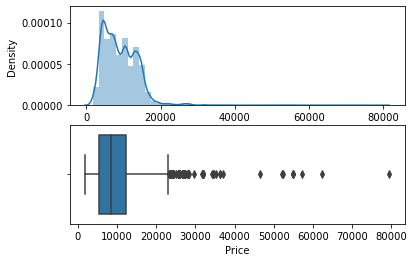

In [89]:
plot(concat_final,'Price')

In [90]:
concat_final['Price']=np.where(concat_final['Price']>=40000,concat_final['Price'].median(),concat_final['Price'])

C:\Users\Saifa\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Saifa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


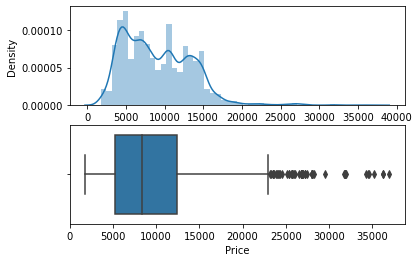

In [91]:
plot(concat_final,'Price')

In [92]:
#fig,(ax1,ax2,ax3)=plt.subplots(3,1)
#sns.stripplot(concat_final['Route_1'],ax=ax1)
#sns.distplot(concat_final['Route_1'],ax=ax2)
#sns.violinplot(concat_final['Route_1'],ax=ax3)


In [93]:
#sns.rugplot(concat_final['Price'])

In [94]:
concat_final.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Chennai,Delhi,Kolkata,Mumbai,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,0,0,13,29,13,5,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,3897.0,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,7662.0,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,13882.0,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,6218.0,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,13302.0,3,1,16,50,21,35,4,45


In [95]:
x = concat_final.drop('Price', axis=1)

In [96]:
x.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Chennai,Delhi,Kolkata,Mumbai,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,0,0,13,29,13,5,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,3,1,16,50,21,35,4,45


In [97]:
x.shape

(10682, 34)

In [98]:
y = concat_final['Price']
y.head()

0     3897.0
1     7662.0
2    13882.0
3     6218.0
4    13302.0
Name: Price, dtype: float64

# Feature selection from data

In [99]:
from sklearn.feature_selection import mutual_info_classif

In [100]:
mutual_info_classif(x,y)

array([2.16378272, 1.9971663 , 2.74494651, 2.30487491, 1.5070219 ,
       0.82979169, 1.53449553, 0.4013224 , 0.29203776, 0.16444221,
       0.36766483, 0.1494632 , 1.54672598, 0.8728038 , 0.29741415,
       0.76701324, 0.11429436, 0.66677001, 0.92200126, 0.00380355,
       0.56353522, 0.01306327, 0.33797509, 0.00347332, 0.21722849,
       0.00505655, 1.08003504, 0.83110021, 1.41655536, 1.2140679 ,
       1.83794042, 1.53269509, 1.78808534, 1.08049787])

In [101]:
imp=pd.DataFrame(mutual_info_classif(x,y), index = x.columns)
imp

,0
Total_Stops,2.170699
Route_1,2.014314
Route_2,2.761940
Route_3,2.321825
Route_4,1.482967
Route_5,0.671528
Cochin,1.522698
Delhi,0.403447
Hyderabad,0.306652
Kolkata,0.163006


In [102]:
imp.columns = ['importance']
imp.sort_values(by = 'importance', ascending=False)

,importance
Route_2,2.761940
Route_3,2.321825
Total_Stops,2.170699
Route_1,2.014314
Arrival_Time_hour,1.891391
Duration_hours,1.763211
Delhi,1.530661
Cochin,1.522698
Arrival_Time_minute,1.514610
Route_4,1.482967


# Machine Learning Algorithm
Random Forest

In [103]:
from sklearn.model_selection import train_test_split

In [104]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2) 

In [105]:
from sklearn import metrics
import pickle

def predict(ml_model,dump):
    model = ml_model()
    model.fit(X_train, y_train)  
    
    #relationship learning 
    #fit() that only fit the data which is synonymous to train, that is fit the data means train the data.
    #score() is something like testing or predict.
    
    print('Training score: {}'.format(model.score(X_train,y_train)))
    predictions=model.predict(X_test)
    print('Predictions are: {}'.format(predictions))
    print('\n')
    r2_score=metrics.r2_score(y_test,predictions)
    print('r2 score is: {}'.format(r2_score))
    
    print('MAE: ', metrics.mean_absolute_error(y_test,predictions))
    print('MSE: ',metrics.mean_squared_error(y_test,predictions))
    print('RMSE: ',np.sqrt(metrics.mean_absolute_error(y_test,predictions)))
    
    #sns.displot(y_test) 
    sns.displot(predictions)
    
    #here 'displot' accepts one parameter that is why only y_test is given not both, in case of 'histplot' also it accepts one parameter
    
    
    if dump==1:
        file=open(r'C:\Users\Saifa\Desktop\data science course\project-1(flight fare)/model.pkl','wb')
        pickle.dump(model,file)

In [106]:
from sklearn.ensemble import RandomForestRegressor

Training score: 0.9543591592419308
Predictions are: [10316.06        3857.74533333 13902.70833333 ... 10969.245
 10892.36        3860.06285714]


r2 score is: 0.8160998828721558
MAE:  1143.7409236313263
MSE:  3547873.506721282
RMSE:  33.81923895700975


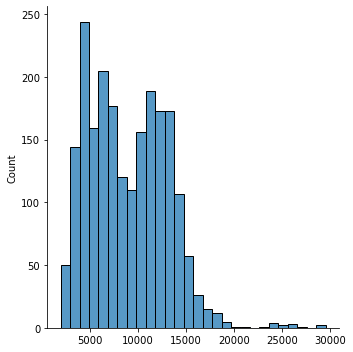

In [107]:
predict(RandomForestRegressor,1)

Training score: 0.9550199963636888
Predictions are: [10298.96333333  3847.44266667 13967.565      ... 11083.28
 10844.          3862.554     ]


r2 score is: 0.8169202011224015
MAE:  1138.052860404466
MSE:  3532047.603874776
RMSE:  33.73503906036669


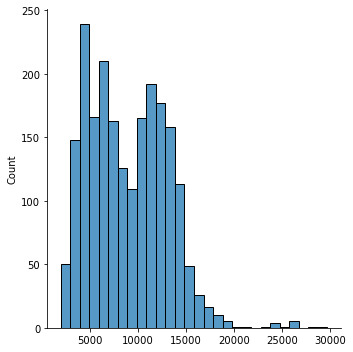

In [108]:
predict(RandomForestRegressor,0)

In [109]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

Training score: 0.883908718548859
Predictions are: [10262.  3873. 14781. ... 10844. 10844.  3841.]


r2 score is: 0.6726312682803792
MAE:  1408.9868975198876
MSE:  6315726.538605521
RMSE:  37.53647422867374


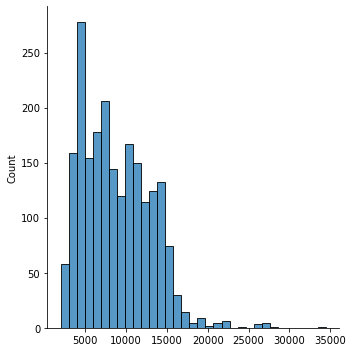

In [110]:
predict(DecisionTreeClassifier,0)

Training score: 0.967408573903931
Predictions are: [10262.  3857. 14781. ... 10844. 10844.  3857.]


r2 score is: 0.7235008743460222
MAE:  1321.231204180315
MSE:  5334330.058405475
RMSE:  36.34874418986597


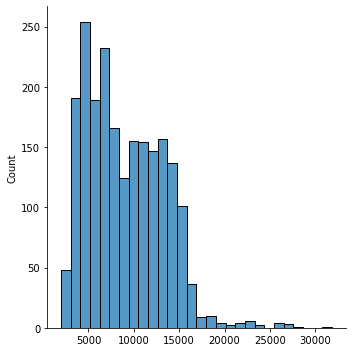

In [111]:
predict(DecisionTreeRegressor,0)

Training score: 0.6151054716948948
Predictions are: [10432.25  5053.25 12115.25 ... 11223.25 11279.75  4913.75]


r2 score is: 0.6153234678665158
MAE:  1918.615933551708
MSE:  7421331.200485494
RMSE:  43.802008327834784


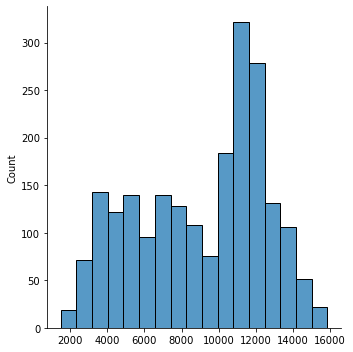

In [112]:
predict(LinearRegression,0)

Training score: 0.7860606094933733
Predictions are: [13643.2  3866.6 13164.2 ...  9571.2 10844.   3860.2]


r2 score is: 0.6462272442992893
MAE:  1708.598689751989
MSE:  6825123.371062236
RMSE:  41.33519916187642


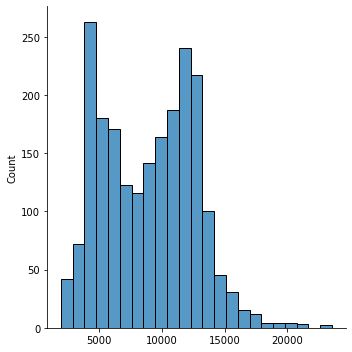

In [113]:
predict(KNeighborsRegressor,0)

# Hypertuning the model with cross-validation(CV)

In [114]:
from sklearn.ensemble import RandomForestRegressor

In [115]:
reg_rf=RandomForestRegressor()

In [116]:
from sklearn.model_selection import RandomizedSearchCV

In [117]:
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=6)]

max_depth= [int(x) for x in np.linspace(start=5,stop=30,num=4)]

In [118]:
random_grid={
    'n_estimators': n_estimators,
    'max_features': ['auto','sqrt'],
    'max_depth':max_depth,
    'min_samples_split':[5,10,15,100]
}

In [119]:
random_grid

{'n_estimators': [100, 320, 540, 760, 980, 1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 13, 21, 30],
 'min_samples_split': [5, 10, 15, 100]}

In [120]:
rf_random=RandomizedSearchCV(estimator=reg_rf,param_distributions=random_grid,cv = 3, verbose=2,n_jobs=-1)

In [121]:
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.0min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [100, 320, 540, 760,
                                                         980, 1200]},
                   verbose=2)

In [122]:
rf_random.best_params_

{'n_estimators': 980,
 'min_samples_split': 15,
 'max_features': 'auto',
 'max_depth': 13}

In [123]:
prediction=rf_random.predict(X_test)

C:\Users\Saifa\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


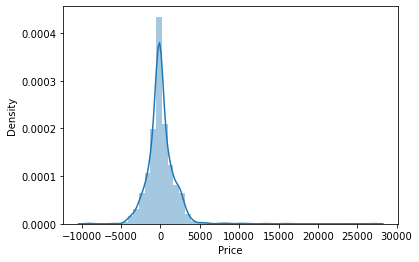

In [124]:
sns.distplot(y_test-prediction)

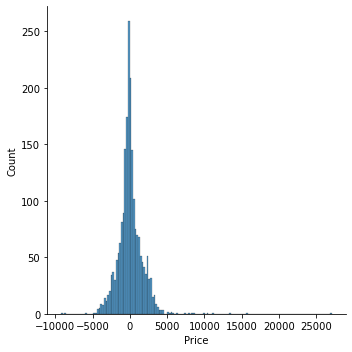

In [125]:
sns.displot(y_test-prediction)

In [126]:
metrics.r2_score(y_test,prediction)

0.8413780140315081

In [127]:
file=open(r'C:\Users\Saifa\Desktop\data science course\project-1(flight fare)/rf_random_hypertuned.pkl','wb')

In [128]:
pickle.dump(rf_random,file)

In [129]:
model=open(r'C:\Users\Saifa\Desktop\data science course\project-1(flight fare)/rf_random_hypertuned.pkl','rb')
forest=pickle.load(model)

In [130]:
predictions2=forest.predict(X_test)

In [131]:
metrics.r2_score(y_test,predictions2)

0.8413780140315081